<a href="https://colab.research.google.com/github/LawZhou/AtChannel-decentralized-video-platform/blob/master/MIE1624_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_kaggle_data_2020.csv",
                 low_memory=False)
# df = pd.read_csv("data/clean_kaggle_data.csv", low_memory=False)
features = df.iloc[1:, :-2].copy()
# col Q4_Encoded
targets = df.iloc[1:, -2].copy()

# Question 1: Data cleaning

In [94]:
features.shape

(10729, 355)

In [95]:
num_col = ['Time from Start to Finish (seconds)']
# Not multiple choice columns
not_mc_cols = []
for col in features.columns:
  if '_' not in col and col not in num_col:
    not_mc_cols.append(col)

In [96]:
mc_cols = []
# Multiple choice columns
for col in features.columns:
  if col not in not_mc_cols and col not in num_col:
    mc_cols.append(col)

## Clean non-MC columns

In [97]:
features[not_mc_cols].isnull().sum(axis=0)

Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q8      561
Q11     561
Q13     561
Q15     561
Q20       0
Q21       0
Q22       0
Q24       0
Q25     159
Q30    7216
Q32    9231
Q38    1253
dtype: int64

In [98]:
# Drop rows that contain over 15 NaNs
features[not_mc_cols] = features[not_mc_cols].dropna(axis=0, how='any', thresh=15, subset=None)
# Assign NaN to category 'Unknown'
for col in not_mc_cols:
  features.loc[features[col].isnull(), col] = 'Unknown'

In [99]:
for col in not_mc_cols:
    print(f'Number of unique elements in {col}: {features[col].nunique()}')

Number of unique elements in Q1: 12
Number of unique elements in Q2: 6
Number of unique elements in Q3: 56
Number of unique elements in Q4: 8
Number of unique elements in Q5: 12
Number of unique elements in Q6: 7
Number of unique elements in Q8: 14
Number of unique elements in Q11: 6
Number of unique elements in Q13: 6
Number of unique elements in Q15: 10
Number of unique elements in Q20: 6
Number of unique elements in Q21: 8
Number of unique elements in Q22: 7
Number of unique elements in Q24: 26
Number of unique elements in Q25: 7
Number of unique elements in Q30: 18
Number of unique elements in Q32: 15
Number of unique elements in Q38: 7


In [100]:
features['Q3'].value_counts()

India                                                   2150
United States of America                                1422
Other                                                    753
Unknown                                                  695
Brazil                                                   415
Japan                                                    374
Russia                                                   335
United Kingdom of Great Britain and Northern Ireland     334
Germany                                                  249
Spain                                                    222
Nigeria                                                  217
France                                                   190
Canada                                                   189
Italy                                                    175
China                                                    162
Turkey                                                   153
Australia               

We can find out that Q3 has too many categories that may slow down learning. We can truncate the insignificant ones.

In [101]:
def remove_insiginicances(data, col, threshold):
  counts = data[col].value_counts()
  value_mask = data[col].isin(counts.index[counts < threshold])
  data.loc[value_mask,col] = "Other"
# remove categories appearing below 100 times
remove_insiginicances(features, 'Q3', 100)
features['Q3'].value_counts()

Other                                                   2501
India                                                   2150
United States of America                                1422
Unknown                                                  695
Brazil                                                   415
Japan                                                    374
Russia                                                   335
United Kingdom of Great Britain and Northern Ireland     334
Germany                                                  249
Spain                                                    222
Nigeria                                                  217
France                                                   190
Canada                                                   189
Italy                                                    175
China                                                    162
Turkey                                                   153
Australia               

In [102]:
# one-hot encoding
features = pd.get_dummies(data=features, columns=not_mc_cols)

In [103]:
features.head()

,Time from Start to Finish (seconds),Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,...,Q30_Amazon Athena,Q30_Amazon DynamoDB,Q30_Amazon Redshift,Q30_Google Cloud BigQuery,Q30_Google Cloud Firestore,Q30_Google Cloud SQL,Q30_IBM Db2,Q30_Microsoft Access,Q30_Microsoft Azure Data Lake Storage,Q30_Microsoft SQL Server,Q30_MongoDB,Q30_MySQL,Q30_Oracle Database,Q30_Other,Q30_PostgresSQL,Q30_SQLite,Q30_Snowflake,Q30_Unknown,Q32_Alteryx,Q32_Amazon QuickSight,Q32_Domo,Q32_Einstein Analytics,Q32_Google Data Studio,Q32_Looker,Q32_Microsoft Power BI,Q32_Other,Q32_Qlik,Q32_SAP Analytics Cloud,Q32_Salesforce,Q32_Sisense,Q32_TIBCO Spotfire,Q32_Tableau,Q32_Unknown,"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,Q38_Unknown
1,289287,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,860,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,507,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,762,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,742,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## Clean MC columns

In [104]:
# Fill NaNs with 0 and others with 1
dummies = features[mc_cols].fillna(0)
dummies[dummies != 0] = 1
features[mc_cols] = dummies

In [105]:
features.head()

,Time from Start to Finish (seconds),Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,...,Q30_Amazon Athena,Q30_Amazon DynamoDB,Q30_Amazon Redshift,Q30_Google Cloud BigQuery,Q30_Google Cloud Firestore,Q30_Google Cloud SQL,Q30_IBM Db2,Q30_Microsoft Access,Q30_Microsoft Azure Data Lake Storage,Q30_Microsoft SQL Server,Q30_MongoDB,Q30_MySQL,Q30_Oracle Database,Q30_Other,Q30_PostgresSQL,Q30_SQLite,Q30_Snowflake,Q30_Unknown,Q32_Alteryx,Q32_Amazon QuickSight,Q32_Domo,Q32_Einstein Analytics,Q32_Google Data Studio,Q32_Looker,Q32_Microsoft Power BI,Q32_Other,Q32_Qlik,Q32_SAP Analytics Cloud,Q32_Salesforce,Q32_Sisense,Q32_TIBCO Spotfire,Q32_Tableau,Q32_Unknown,"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,Q38_Unknown
1,289287,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,860,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,507,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,762,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,742,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [106]:
# turn into array
feature_col_names = features.columns
features = features.values
targets = targets.values

# Split train test

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     features, targets, test_size=0.2, random_state=42)
print(f"Shape of train features: {X_train.shape}")
print(f"Shape of test features: {X_test.shape}")

Shape of train features: (8583, 536)
Shape of test features: (2146, 536)


# Question 2: Exploratory data analysis and feature selection 

In [108]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=20)
X_train = sel.fit_transform(X_train, y_train)
X_test = sel.transform(X_test)

In [109]:
# k most important features
feature_col_names[sel.get_support(indices=True)]

Index(['Q3_India', 'Q3_United States of America', 'Q24_$0-999',
       'Q24_1,000-1,999', 'Q24_10,000-14,999', 'Q24_100,000-124,999',
       'Q24_125,000-149,999', 'Q24_15,000-19,999', 'Q24_150,000-199,999',
       'Q24_20,000-24,999', 'Q24_200,000-249,999', 'Q24_25,000-29,999',
       'Q24_30,000-39,999', 'Q24_40,000-49,999', 'Q24_5,000-7,499',
       'Q24_50,000-59,999', 'Q24_60,000-69,999', 'Q24_70,000-79,999',
       'Q24_80,000-89,999', 'Q24_90,000-99,999'],
      dtype='object')

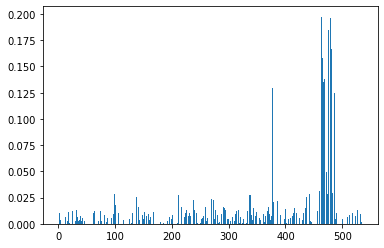

In [110]:
# plot feature importances of all feature
plt.bar([x for x in range(len(sel.scores_))], sel.scores_)
plt.show()

# Question 3 Model implementation

In [111]:
from sklearn.linear_model import LogisticRegression
# Ordinal logistic regression

class OrdinalLogits():
  def __init__(self, n_class, hyperparams={}):
    self.clfs = {}
    self.n_class = n_class
    self.hyperparams = hyperparams

  def fit(self, X, y):
    classes = np.unique(y)
    for cls in classes:
      if cls == np.max(classes):
        continue
      cls_0_idx = y <= cls
      cls_1_idx = y > cls
      ordinal_y = np.array(y)
      ordinal_y[cls_0_idx] = 0
      ordinal_y[cls_1_idx] = 1
      clf = LogisticRegression(**self.hyperparams).fit(X, ordinal_y)
      self.clfs[int(cls)] = clf


  def predict(self, X):
    probs = np.zeros((X.shape[0], self.n_class))
    for cls in range(self.n_class):
      if cls == self.n_class-1:
        clf = self.clfs[cls-1]
      else:
        clf = self.clfs[cls]
      predicted_y = clf.predict_proba(X)

      if cls == 0:
        probs[:, 0] = predicted_y[:, 0]
      elif cls == self.n_class-1:
        probs[:, self.n_class-1] = predicted_y[:, 1]
      else:
        prev_clf_probs = self.clfs[cls-1].predict_proba(X)
        probs[:, cls] = predicted_y[:, 0] - prev_clf_probs[:, 0]
    predictions = np.argmax(probs, axis=1)
    return predictions


In [112]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
def run_kfold(X, y, model, n_splits=10):  
    skf = StratifiedKFold(n_splits=n_splits)
    f1_train = np.zeros(n_splits)
    f1_val = np.zeros(n_splits)
    fold = 0
    
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        
        f1_train[fold] = f1_score(y_train, predictions_train, average='weighted')
        f1_val[fold] = f1_score(y_val, predictions_val, average='weighted')
       
        fold += 1   
        
    f1_mean = np.mean(f1_val)
    f1_var=np.var(f1_val)
    return f1_mean, f1_var 

# Question 4

In [129]:
from sklearn.model_selection import ParameterGrid
def tune_hyperparams(X, y, params, n_fold=10):
  n_class = len(np.unique(y))
  param_grid = list(ParameterGrid(params))
  model_scores = {}
  for param in param_grid:
    print(f"Running {n_fold}-fold with hyperparameters: {param}")
    model = OrdinalLogits(n_class=n_class, hyperparams = param)
    f1_mean, f1_var = run_kfold(X, y, model, n_fold)
    model_scores[f1_mean] = model
    print(f"Ending with {round(f1_mean, 3)} f1-score mean and {round(f1_var, 3)} f1-score variance")
  # return the model with the best f1 score
  return model_scores[max(model_scores, key=float)]
# param_grid = {'penalty': ['l1', 'l2', 'elasticnet']}
param_grid = {'C': [0.01, 0.1, 1, 10]}
best_model = tune_hyperparams(X_train, y_train, param_grid)

Running 10-fold with hyperparameters: {'C': 0.01}
Ending with 0.864 f1-score mean and 0.0 f1-score variance
Running 10-fold with hyperparameters: {'C': 0.1}
Ending with 0.954 f1-score mean and 0.0 f1-score variance
Running 10-fold with hyperparameters: {'C': 1}
Ending with 0.966 f1-score mean and 0.0 f1-score variance
Running 10-fold with hyperparameters: {'C': 10}
Ending with 0.966 f1-score mean and 0.0 f1-score variance


# Question 5

In [130]:
prediction_train = best_model.predict(X_train)
f1_score(y_train, prediction_train, average='weighted')

0.9662819051093474

In [131]:
prediction_test = best_model.predict(X_test)
f1_score(y_test, prediction_test, average='weighted')

0.9628917350783441

Text(0.5, 1.0, 'Training set predictions')

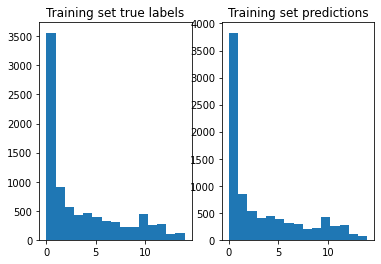

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train, bins=15)
ax1.set_title('Training set true labels')
ax2.hist(prediction_train, bins=15)
ax2.set_title('Training set predictions')

Text(0.5, 1.0, 'Testing set predictions')

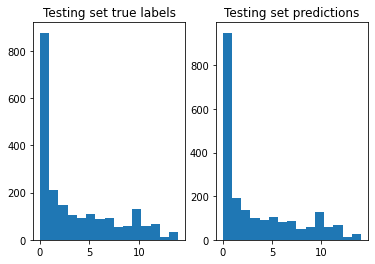

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_test, bins=15)
ax1.set_title('Testing set true labels')
ax2.hist(prediction_test, bins=15)
ax2.set_title('Testing set predictions')